# Imports

In [2]:
import numpy as np
import pandas as pd
from pandas import DataFrame as dataframe
import matplotlib.pyplot as plt
# import seaborn as sns
import os
from os.path import join

In [28]:
print(os.getcwd())

base_dir = os.getcwd()
paths={
    'data': join(base_dir, 'data'),
    'raw': join(base_dir, 'data', 'raw'),
    'processed': join(base_dir, 'data', 'processed'),
    'zip': join(base_dir, 'data', 'zip'),
}

d:\MalwareHunter\MH-100K-dataset


In [4]:
os.listdir(paths['processed'])

['mh100-features-all.csv',
 'mh100-features-classes.csv',
 'mh100.npy',
 'mh100_labels.csv',
 'mh100_vt-labels.csv']

In [5]:
files = dataframe(os.listdir(paths['processed']), columns=['filename'])
files

,filename
0,mh100-features-all.csv
1,mh100-features-classes.csv
2,mh100.npy
3,mh100_labels.csv
4,mh100_vt-labels.csv


# MH100 dataset

* API Call:  features
* Permission:  features
* Intent:  features

* Labels: (CLASS, vt_detection)


In [6]:
# Split a tar/zip file to multiple parts of size 1GB
#! split -b 1024m filename.tar.gz 'filename.tar.gz.part-'


def load_mh100(dataset_path, labels_path, features_path):
    dataset = np.load(dataset_path)
    labels = pd.read_csv(labels_path, index_col=0)
    feature_names =  pd.read_csv(features_path, index_col=0)    
    classes_names = ['benign', 'malware']
    return dataset, labels, feature_names, classes_names

In [7]:
os.listdir(paths['processed'])

['mh100-features-all.csv',
 'mh100-features-classes.csv',
 'mh100.npy',
 'mh100_labels.csv',
 'mh100_vt-labels.csv']

In [8]:
data, labels, feature_names, classes_names = load_mh100(
    dataset_path =join(paths['processed'], 'mh100.npy'),
    labels_path = join(paths['processed'], 'mh100_labels.csv'),
    features_path = join(paths['processed'], 'mh100-features-all.csv')
)

In [10]:
print(data.shape, labels.shape, feature_names.shape)

(101934, 24833) (101934, 9) (24833, 1)


In [11]:
labels

,SHA256,NOME,PACOTE,API_MIN,API,vt_detection,CLASS,VT_Malware_Deteccao,AZ_Malware_Deteccao
0,080da3f89e42250d7462e17b40535cfca9b1a6a8370a31...,2019 شاب دوزي‎,com.arabprod.aghani.douzi,10,26,0,0,0,0
1,461760796dd7789673cfaf68383da103033d54eb4a5267...,Ishas,appinventor.ai_shameertanur.Ishas,7,28,0,0,1,0
2,dab8b14c3178b15200b23e47cecb9cc26b51c87d599ac0...,Lashes&Go,net.flowww.z.sk596381,16,26,0,0,0,0
3,db802025f9ec474d79793ac2aac556d2b52162ebc493e2...,58到家,com.wuba.jiazheng,17,25,5,1,5,5
4,a44920abdd4915117412ad7695b8d95a1da5edfa513b09...,TEDDY AFRO,million.t.com.teddy.afro.com,16,27,2,1,1,2
...,...,...,...,...,...,...,...,...,...
101929,67c2668b321c1cd06e3b4f54261e9bc24d0be1ece92ed5...,Eric Clapton Lyrics,com.msmstudios.ericclyrics,15,23,6,1,4,6
101930,67c26a0ba216d216f652d6534225bc0534c4583fde6500...,Miner,com.PIG.Miner,16,27,0,0,0,0
101931,67c272489d9a82dbdc73a2da78167e035d88764c98ba3f...,Webloaded Tech,com.webloadedblog,21,29,0,0,0,0
101932,67c2744111f1ecdf28faf89ace9bf91d10163001db7bd7...,RepostExchange,com.repostexchange.app,23,28,0,0,0,0


In [12]:
feature_names

,features
index,
5,Permission::WAKE_LOCK
6,Permission::WRITE_EXTERNAL_STORAGE
7,Permission::ACCESS_NETWORK_STATE
8,Permission::WRITE_SETTINGS
9,Permission::INTERNET
...,...
24837,APICall::Landroid/widget/TableRow.getLeft()
24838,APICall::Landroid/widget/HorizontalScrollView....
24839,APICall::Landroid/widget/RatingBar.isFocusable()


In [13]:
vt_labels = pd.read_csv(join(paths['processed'],'mh100_vt-labels.csv'))
vt_labels.drop(columns=['index'], inplace=True)
vt_labels

,1-class,2-class,3-class,4-class,5-class,6-class,7-class,8-class,9-class,10-class,...,31-class,32-class,33-class,34-class,37-class,38-class,39-class,41-class,43-class,46-class
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101929,1,1,1,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
101930,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
101931,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
101932,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
vt_labels['4-class'].value_counts()

4-class
0    92134
1     9800
Name: count, dtype: int64

In [18]:
data.shape

(101934, 24833)

In [20]:
feature_names

,features
index,
5,Permission::WAKE_LOCK
6,Permission::WRITE_EXTERNAL_STORAGE
7,Permission::ACCESS_NETWORK_STATE
8,Permission::WRITE_SETTINGS
9,Permission::INTERNET
...,...
24837,APICall::Landroid/widget/TableRow.getLeft()
24838,APICall::Landroid/widget/HorizontalScrollView....
24839,APICall::Landroid/widget/RatingBar.isFocusable()


In [29]:
np.savez_compressed(
    join(paths['data'], 'processed', 'mh100'), 
    data=data, 
    metadata=labels,
    labels=vt_labels['4-class'].values,
    feature_names=feature_names['features'].values,
    classes_names=classes_names
    )

# data, labels, feature_names, classes_names

In [30]:
np.load(join(paths['data'], 'processed', 'mh100.npz')).keys()

KeysView(NpzFile 'd:\\MalwareHunter\\MH-100K-dataset\\data\\processed\\mh100.npz' with keys: data, metadata, labels, feature_names, classes_names)

In [26]:
labels

,SHA256,NOME,PACOTE,API_MIN,API,vt_detection,CLASS,VT_Malware_Deteccao,AZ_Malware_Deteccao
0,080da3f89e42250d7462e17b40535cfca9b1a6a8370a31...,2019 شاب دوزي‎,com.arabprod.aghani.douzi,10,26,0,0,0,0
1,461760796dd7789673cfaf68383da103033d54eb4a5267...,Ishas,appinventor.ai_shameertanur.Ishas,7,28,0,0,1,0
2,dab8b14c3178b15200b23e47cecb9cc26b51c87d599ac0...,Lashes&Go,net.flowww.z.sk596381,16,26,0,0,0,0
3,db802025f9ec474d79793ac2aac556d2b52162ebc493e2...,58到家,com.wuba.jiazheng,17,25,5,1,5,5
4,a44920abdd4915117412ad7695b8d95a1da5edfa513b09...,TEDDY AFRO,million.t.com.teddy.afro.com,16,27,2,1,1,2
...,...,...,...,...,...,...,...,...,...
101929,67c2668b321c1cd06e3b4f54261e9bc24d0be1ece92ed5...,Eric Clapton Lyrics,com.msmstudios.ericclyrics,15,23,6,1,4,6
101930,67c26a0ba216d216f652d6534225bc0534c4583fde6500...,Miner,com.PIG.Miner,16,27,0,0,0,0
101931,67c272489d9a82dbdc73a2da78167e035d88764c98ba3f...,Webloaded Tech,com.webloadedblog,21,29,0,0,0,0
101932,67c2744111f1ecdf28faf89ace9bf91d10163001db7bd7...,RepostExchange,com.repostexchange.app,23,28,0,0,0,0


In [25]:
classes_names

['benign', 'malware']

In [19]:
df_data = dataframe(data, columns=feature_names['features'].values)
df_data = pd.concat([df_data, dataframe(vt_labels['4-class'].values, columns=['class']) ], axis=1)
df_data

,Permission::WAKE_LOCK,Permission::WRITE_EXTERNAL_STORAGE,Permission::ACCESS_NETWORK_STATE,Permission::WRITE_SETTINGS,Permission::INTERNET,Intent::AUDIO_BECOMING_NOISY,APICall::Landroid/content/Intent.toUri(),APICall::Landroid/view/View.setTag(),APICall::Landroid/util/Xml.newSerializer(),APICall::Landroid/content/pm/PackageManager.queryIntentServices(),...,APICall::Landroid/widget/ListView.getScaleX(),APICall::Landroid/widget/ScrollView.setOnApplyWindowInsetsListener(),APICall::Landroid/widget/ExpandableListView.setNextFocusUpId(),APICall::Landroid/widget/ScrollView.setSoundEffectsEnabled(),APICall::Landroid/widget/TableRow.getLeft(),APICall::Landroid/widget/HorizontalScrollView.onKeyUp(),APICall::Landroid/widget/RatingBar.isFocusable(),APICall::Landroid/preference/ListPreference.getView(),APICall::Landroid/widget/LinearLayout.computeHorizontalScrollExtent(),class
0,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,1,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,1,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,1,1,0,1,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101929,1,1,1,0,1,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,1
101930,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
101931,1,1,1,0,1,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
101932,1,1,1,1,1,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [20]:
df_data['class'].value_counts()

class
0    92134
1     9800
Name: count, dtype: int64

In [24]:
df_data.to_csv(
    join(paths['zip'], 'mh100.csv' ), 
    # compression='gzip', 
    index=False
    )

In [32]:
def plot_grid(vt_labels, path_save= [], name='plot grid', figsize=(18, 20)):
    fig = plt.figure(figsize=figsize)
    for i, vt in zip (range(0, vt_labels.shape[0]), vt_labels.columns):
        # print(i, idx)
        ax = plt.subplot(7, 6, i + 1)
        # plt.plot(X[idx_sample])
        unique_tr, counts_tr = np.unique(vt_labels[vt], return_counts=True)

        plt.pie(counts_tr, autopct=lambda p : '{:.1f}% ({:,.0f})'.format(p, p * sum(counts_tr)/100), radius=1.5)

        plt.title(vt)
        # plt.ylim(ylim)
        plt.axis("off")
    plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
    plt.show()
    if path_save:
        fig.savefig(os.path.join(path_save, name+'.png'), format='png', bbox_inches='tight')
    return 

def class_distribution(y_data, classes):
        unique_tr, counts_tr = np.unique(y_data, return_counts=True)
        dict(zip(unique_tr, counts_tr))

        pie = plt.pie(counts_tr, autopct=lambda p : '{:.1f}% ({:,.0f})'.format(p, p * sum(counts_tr)/100), radius=1)
        plt.legend(pie[0], shadow=True, loc="lower right", 
                                  bbox_transform=plt.gcf().transFigure)
        plt.show()

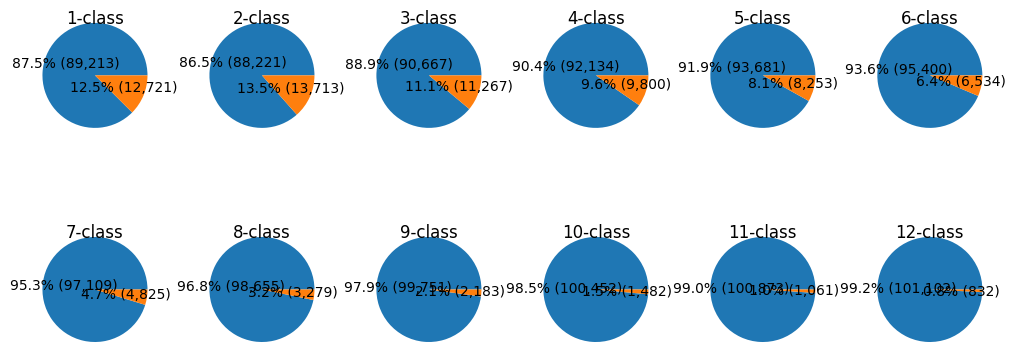

In [36]:
plot_grid(vt_labels.iloc[:, : 12], name='Virus total labels', figsize=(10, 15))

# Feature Selection

## CHI-Square

In [42]:
from sklearn.feature_selection import SelectKBest, chi2

In [ ]:
# def get_chi2(X, y):
#     return chi2_stats, p_values

In [43]:
chi2_stats, p_values =  chi2(data, vt_labels['4-class'])  # Virus total scanners detections >= 4

In [65]:
chi2_stats.shape, p_values.shape

((24833,), (24833,))

In [66]:
df_chi2 = dataframe({
    'names': feature_names.features.values,          # from load_mh100()
    'stats': chi2_stats,
    'p_values': p_values
})

In [67]:
df_chi2

,names,stats,p_values
0,Permission::WAKE_LOCK,1060.083734,1.565320e-232
1,Permission::WRITE_EXTERNAL_STORAGE,752.615485,1.083184e-165
2,Permission::ACCESS_NETWORK_STATE,7.669895,5.614971e-03
3,Permission::WRITE_SETTINGS,7494.456690,0.000000e+00
4,Permission::INTERNET,0.145851,7.025325e-01
...,...,...,...
24828,APICall::Landroid/widget/TableRow.getLeft(),0.106367,7.443190e-01
24829,APICall::Landroid/widget/HorizontalScrollView....,0.106367,7.443190e-01
24830,APICall::Landroid/widget/RatingBar.isFocusable(),0.106367,7.443190e-01
24831,APICall::Landroid/preference/ListPreference.ge...,0.106367,7.443190e-01


In [68]:
chi2_sorted = df_chi2.sort_values(by='stats', ascending=False).dropna()
chi2_sorted

,names,stats,p_values
3242,Permission::MOUNT_UNMOUNT_FILESYSTEMS,2.232101e+04,0.000000
3240,Permission::CHANGE_WIFI_STATE,1.716883e+04,0.000000
3249,Permission::GET_TASKS,1.660002e+04,0.000000
3950,Intent::PACKAGE_REMOVED,1.636516e+04,0.000000
3430,Permission::CHANGE_NETWORK_STATE,1.553867e+04,0.000000
...,...,...,...
6405,APICall::Landroid/preference/PreferenceActivit...,1.295129e-04,0.990920
11990,APICall::Landroid/widget/ListView.getLeft(),5.728691e-05,0.993961
9566,APICall::Landroid/widget/ToggleButton.setPaddi...,1.043630e-07,0.999742
14968,APICall::Landroid/widget/ImageView.offsetLeftA...,1.043630e-07,0.999742


In [71]:
chi2_features = chi2_sorted[chi2_sorted['p_values'] < 0.05]  ## significance level (e.g. α = .05)
chi2_features

,names,stats,p_values
3242,Permission::MOUNT_UNMOUNT_FILESYSTEMS,22321.011249,0.000000
3240,Permission::CHANGE_WIFI_STATE,17168.829776,0.000000
3249,Permission::GET_TASKS,16600.018340,0.000000
3950,Intent::PACKAGE_REMOVED,16365.160445,0.000000
3430,Permission::CHANGE_NETWORK_STATE,15538.667462,0.000000
...,...,...,...
10256,APICall::Landroid/widget/HorizontalScrollView....,3.846674,0.049845
19414,APICall::Landroid/widget/MultiAutoCompleteText...,3.846674,0.049845
10620,APICall::Landroid/nfc/cardemulation/CardEmulat...,3.844322,0.049915
11051,APICall::Landroid/widget/ListView.computeVerti...,3.843878,0.049928
